In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('./movies_train.csv')
test = pd.read_csv('./movies_test.csv')

### movies_train.csv / movies_test.csv
- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

# 데이터 전처리

In [52]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [53]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [54]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [55]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [56]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [57]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [58]:
display(train)
display(test)

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,23398,2012,11,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,7072501,2015,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,6959083,2013,6,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,217866,2012,7,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,483387,2010,11,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,1,510,7,1475091,2014,8,1,0,0,...,0,0,0,0,0,0,0,0,0,1
596,127,1,286,6,1716438,2013,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
597,99,0,123,4,2475,2010,9,0,1,0,...,0,0,0,0,0,0,0,0,0,1
598,102,0,431,4,2192525,2015,5,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,time,dir_prev_num,num_staff,num_actor,년,월,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,125,2,304,3,2010,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,113,4,275,3,2010,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,115,3,419,7,2010,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,116,2,408,2,2010,2,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,110,1,380,1,2010,2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,78,1,4,4,2015,11,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
239,86,0,18,2,2015,10,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
240,107,0,224,4,2015,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
241,102,1,68,7,2015,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 모델 생성 및 예측(과제부분)

## 1. Random Forest

In [59]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [60]:
model=RandomForestRegressor()
model.fit(train_x,train_y)

RandomForestRegressor()

In [61]:
pred_Rf = model.predict(test)

## 2. Decision Tree 

In [62]:
from sklearn.tree import DecisionTreeRegressor
DTRegressor = DecisionTreeRegressor()
from sklearn.model_selection import train_test_split

train_features, valid_features , train_target, valid_target = train_test_split(
    train_x, train_y, test_size = 0.3, random_state = 1000) 

In [63]:
# GridSearch
from sklearn.model_selection import GridSearchCV

param_range1 = [0,1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 15, 20, 25, 30]
param_range3 = ['mse']

param_grid = [{'max_depth': param_range1,
              'min_samples_leaf': param_range2,
              'criterion': param_range3}]

gs = GridSearchCV(estimator = DTRegressor,
                 param_grid = param_grid, 
                 scoring = 'neg_mean_squared_error', 
                 cv=5,
                 n_jobs= -1)

gs = gs.fit(train_features, train_target)

print(-gs.best_score_)
print(gs.best_params_)

2602689441944.574
{'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 25}


C:\Users\hi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [            nan             nan             nan             nan
             nan -3.05550589e+12 -3.05550589e+12 -3.05550589e+12
 -3.05550589e+12 -3.05550589e+12 -2.61387730e+12 -2.76862303e+12
 -2.62794192e+12 -2.60268944e+12 -2.60622844e+12 -2.64406613e+12
 -2.75525673e+12 -2.61064969e+12 -2.63067101e+12 -2.61135852e+12
 -2.65179133e+12 -2.78735344e+12 -2.62521116e+12 -2.63149961e+12
 -2.61091913e+12 -2.68220472e+12 -2.78910841e+12 -2.62430162e+12
 -2.63090139e+12 -2.61060102e+12 -2.68123669e+12 -2.78911641e+12
 -2.62437237e+12 -2.63095110e+12 -2.61065909e+12 -2.68153118e+12
 -2.78914957e+12 -2.62430822e+12 -2.63086840e+12 -2.61060352e+12
 -2.68126786e+12 -2.78912083e+12 -2.62428437e+12 -2.63086973e+12
 -2.61060349e+12 -2.68125269e+12 -2.78911243e+12 -2.62428563e+12
 -2.63087026e+12 -2.61060349e+12 -2.68125144e+12 -2.78906107e+12
 -2.62428562e+1

In [64]:
best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(train_features, train_target)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=25)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
best_pred = best_tree.predict(valid_features)
print(f'MSE: {mean_squared_error(valid_target,best_pred) :.5f}')
print(f'R squared: {r2_score(valid_target, best_pred):.5f}' )

MSE: 2468837403494.11426
R squared: 0.21241


## 3. XGB BOOSTER 

In [66]:
import xgboost as xgb
XGBRegressor = xgb.XGBRegressor()
XGBRegressor.fit(train_features,train_target)
XGBpred = XGBRegressor.predict(valid_features)
print('R squared: %.3f' % r2_score(valid_target, XGBpred))
print('MSE: %.3f' % mean_squared_error(valid_target,XGBpred))

R squared: -0.135
MSE: 3559314804443.211


### 모델 성능 평균 

In [67]:
## DT
best_tree2 = gs.best_estimator_
best_tree2.fit(train_x, train_y)
pred_Dt = best_tree.predict(test)

In [68]:
## XGB 
XGBRegressor2 = xgb.XGBRegressor()
XGBRegressor2.fit(train_x,train_y)
pred_Xgb = XGBRegressor.predict(test)

In [69]:
predictions = [pred_Rf, pred_Dt, pred_Xgb]
pred = sum(predictions)/3

# 제출

In [70]:
submission = pd.read_csv('./submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [71]:
submission['box_off_num'] = pred

In [72]:
submission = submission.sort_values(by = 'box_off_num')

In [73]:
submission

,title,box_off_num
154,그댄 나의 뱀파이어,2.232315e+04
241,말하지 못한 비밀,2.350775e+04
120,홀리,2.468142e+04
103,밀월도 가는 길,2.474119e+04
26,할,2.647950e+04
...,...,...
189,레디액션 청춘,5.365376e+06
142,박수건달,5.380516e+06
135,용의자,5.475410e+06
179,군도: 민란의 시대,7.301108e+06


In [74]:
submission.to_csv('베이스라인.csv',index = False)

# 제출 점수(과제부분)

대회 마감이 7월 31일 오후 6시까진데 제가 이 과제를 7월 31일 오후 10시정도에 마무리를 해서 제출이 되지 않습니다. 죄송합니다..

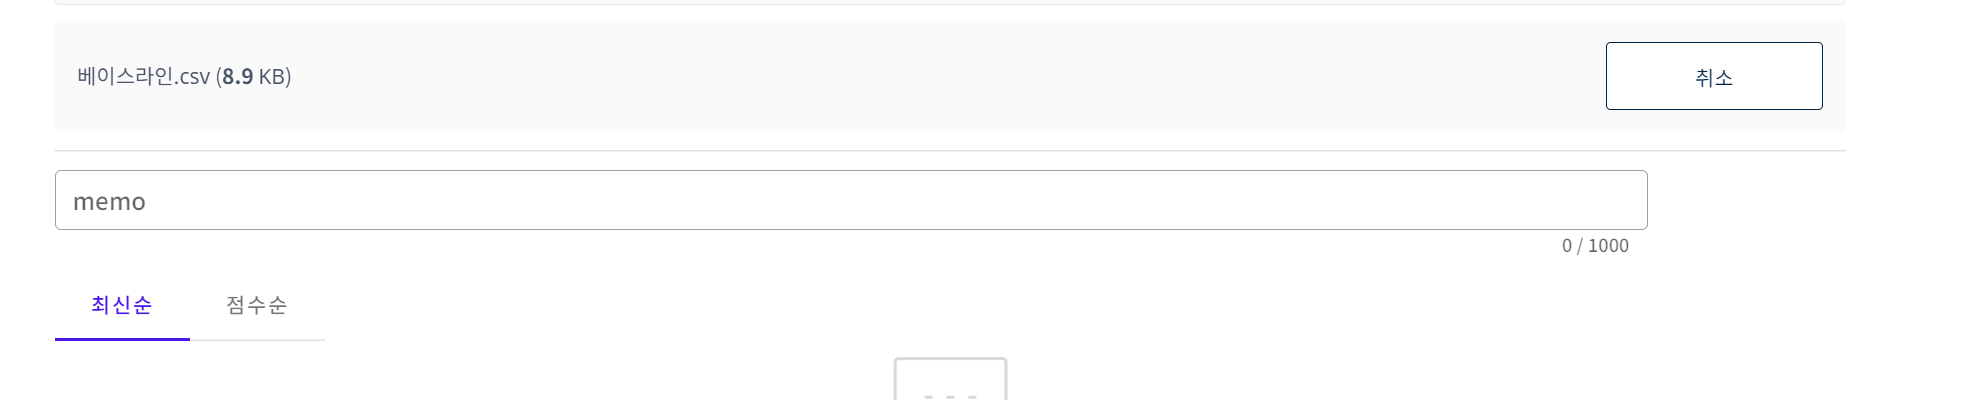